## Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

---

#### Data Loading

In [2]:
data = pd.read_csv('dataset/twitter_sentiments.csv')
data.head()

data.drop(['id'], inplace=True, axis=1)

In [3]:
print(f'Class 0 :: percentage of data : {round(data.label.value_counts()[0] / data.shape[0] * 100,2)}%')
print(f'Class 1 :: percentage of data : {round(data.label.value_counts()[1] / data.shape[0] * 100,2)}%')

more = round(data.label.value_counts()[0] / data.shape[0] * 100,2) / round(data.label.value_counts()[1] / data.shape[0] * 100,2)

print(f'\nClass 0 is {round(more,2)}x times more than Class 1')

Class 0 :: percentage of data : 92.99%
Class 1 :: percentage of data : 7.01%

Class 0 is 13.27x times more than Class 1


In [4]:
print(data[data["label"]==0].shape)
print(data[data["label"]==1].shape)

(29720, 2)
(2242, 2)


In [5]:
# Dependent Attribute // Target Attribute
y = data['label']

# Independent Attribute
X = data.drop(['label'], axis=1)

C:\Users\khwaj\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


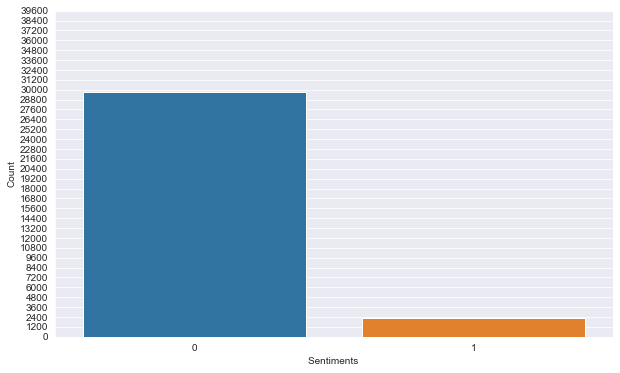

In [6]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))
plt.yticks(range(0,40000,1200))

plt.ylabel('Count')
plt.xlabel('Sentiments ')

plt.show()

In [7]:
# from imblearn.random_sampling  import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

rdm=RandomOverSampler()
X,y=rdm.fit_sample(X,y)

Data = pd.concat([X,y],axis=1)  #updating the balanced form of dataset

In [8]:
Data.head()

,tweet,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


In [9]:
Data.shape

(59440, 2)

In [10]:
Data['label'].value_counts()

0    29720
1    29720
Name: label, dtype: int64

In [11]:
print(Data[Data["label"]==0].shape)
print(Data[Data["label"]==1].shape)

(29720, 2)
(29720, 2)


#### Train Test Split

<pre>
We will stratify the data on the label column so that the distribution of the target label will be the same in both 
train and test data

In [12]:
Y = Data['label']

In [13]:
train,test = train_test_split(Data,test_size=0.2, stratify=Y, random_state=20)

## Pipeline

<pre><b>
As we know for the implementing the Logistic Regression Model ; We need the data in proper format i.e. the unnecessary 
words need to be remove before predicting the result

In order to implement this we need to create a pipeline and add both the models i.e. Tfidf and the Logistic Regression 
with the required parameters

In [14]:
pipeline = Pipeline(steps=[
    
    ('tfidf', TfidfVectorizer(lowercase= True,\
                             stop_words=ENGLISH_STOP_WORDS,\
                             max_features=1000)),
    
    ('lr_model', LogisticRegression())
    
])

In [15]:
# Fitting the Training Dataset
pipeline.fit(train.tweet, train.label)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=1000,
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
           

### Testing the Pipeline

In [16]:
text = ['This isnt great news for the Muslim Community!!']

pipeline.predict(text)

array([1], dtype=int64)

In [17]:
# text = ['You Mother Fucker!! Dont you have sense in communicating with the BOSS']
# text = ["@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot "]

# text = ["I’m in the mood to kill a [racial slur], who’s with me?"]
# text = ["retweet if you agree! "]

# text = ["I’m sick of these [religious group] thinking they are better than us, if any of you see someone wearing a [religious symbol of the religious group], grab it off them and post pics!"]

# text =['Scotland abolished torture in 1708, France did so in 1798, and other countries followed suit, so that by the beginning of the 19th century the practice of torture had been officially abandoned in much of Europe.']
# text = ["I will burn aout the entire place if any of our army is attacked or toutured"]

text =["A more concerted effort against torture was galvanized by the revelation of atrocities committed by Japan \
        and Nazi Germany during World War II."]

pipeline.predict(text)

array([1], dtype=int64)

In [18]:
text = ["WHat the hell are you up too. You cant do this. This is agaunst the law. You cant kill someone"]

pipeline.predict(text)

array([1], dtype=int64)

## Saving the Pipeline Model

In [19]:
# import joblib
from joblib import dump

# dump the pipeline model
dump(pipeline, filename="text_classification.joblib")

['text_classification.joblib']

#### Testing the saved model

In [20]:
# import joblib
from joblib import load

# sample tweet text
text = ["Virat Kohli, AB de Villiers set to auction their 'Green Day' kits from 2016 IPL match to raise funds"]

# load the saved pipleine model
pipeline = load("text_classification.joblib")

# predict on the sample tweet text
pipeline.predict(text)

array([0], dtype=int64)